In [1]:
d <- read.csv("resENARMtot2018.csv")
head(d)

fac,sust,sel,efi,agno
Universidad Autónoma de Aguascalientes,115,35,0.3043478,2001
Universidad Autónoma de Baja California-Mexicali,147,73,0.4965986,2001
Universidad Autónoma de Baja California-Tijuana,98,33,0.3367347,2001
Centro de Estudios Universitarios Xochicalco-Ensenada,24,7,0.2916667,2001
Universidad Autónoma de Campeche,51,9,0.1764706,2001
Universidad Autónoma de Chiapas,243,30,0.1234568,2001


In [2]:
head(unique(d$fac))

[1] Universidad Autónoma de  Aguascalientes              
[2] Universidad Autónoma de Baja California-Mexicali     
[3] Universidad Autónoma de Baja California-Tijuana      
[4] Centro de Estudios Universitarios Xochicalco-Ensenada
[5] Universidad Autónoma de Campeche                     
[6] Universidad Autónoma de Chiapas                      
347 Levels: B. UNIV. AUT. PUEBLA (PUEBLA) ... Universidad West Hill Institute, S.C.

In [28]:
d$fac <- toupper(d$fac)
head(d$fac)

[1] "UNIVERSIDAD AUTÓNOMA DE  AGUASCALIENTES"              
[2] "UNIVERSIDAD AUTÓNOMA DE BAJA CALIFORNIA-MEXICALI"     
[3] "UNIVERSIDAD AUTÓNOMA DE BAJA CALIFORNIA-TIJUANA"      
[4] "CENTRO DE ESTUDIOS UNIVERSITARIOS XOCHICALCO-ENSENADA"
[5] "UNIVERSIDAD AUTÓNOMA DE CAMPECHE"                     
[6] "UNIVERSIDAD AUTÓNOMA DE CHIAPAS"

In [4]:
tots <- d[grep("TOT",d$fac),]
print(dim(d))
head(tots)

[1] 1405    5


,fac,sust,sel,efi,agno
63,TOTAL DE MÉDICOS MEXICANOS,18077,3374,0.1866460,2001
65,TOTAL DE MÉDICOS EXTRANJEROS,253,105,0.4150198,2001
133,TOTAL DE MEXICANOS,19599,4470,0.2280729,2002
135,TOTAL DE ASPIRANTES,19906,4560,0.2290767,2002
202,TOTAL DE MÉDICOS MEXICANOS,19907,4627,0.2324308,2003
205,TOTAL DE MÉDICOS EXTRANJEROS,264,84,0.3181818,2003


In [5]:
d <- subset(d,!(d$fac %in% tots$fac))
print(dim(d))

[1] 1390    5


In [6]:
str(d)

'data.frame':	1390 obs. of  5 variables:
 $ fac : chr  "UNIVERSIDAD AUTÓNOMA DE  AGUASCALIENTES" "UNIVERSIDAD AUTÓNOMA DE BAJA CALIFORNIA-MEXICALI" "UNIVERSIDAD AUTÓNOMA DE BAJA CALIFORNIA-TIJUANA" "CENTRO DE ESTUDIOS UNIVERSITARIOS XOCHICALCO-ENSENADA" ...
 $ sust: int  115 147 98 24 51 243 40 94 123 139 ...
 $ sel : int  35 73 33 7 9 30 3 46 26 50 ...
 $ efi : num  0.304 0.497 0.337 0.292 0.176 ...
 $ agno: int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...


In [7]:
probExitoTot <- sum(d$sel)/sum(d$sust)
probExitoTot

[1] 0.243715

In [8]:
library(MASS)

In [9]:
fractions(0.244)

[1] 61/250

In [10]:
class(d$agno)

[1] "integer"

In [11]:
d$agno <- as.factor(d$agno)

In [12]:
str(d)

'data.frame':	1390 obs. of  5 variables:
 $ fac : chr  "UNIVERSIDAD AUTÓNOMA DE  AGUASCALIENTES" "UNIVERSIDAD AUTÓNOMA DE BAJA CALIFORNIA-MEXICALI" "UNIVERSIDAD AUTÓNOMA DE BAJA CALIFORNIA-TIJUANA" "CENTRO DE ESTUDIOS UNIVERSITARIOS XOCHICALCO-ENSENADA" ...
 $ sust: int  115 147 98 24 51 243 40 94 123 139 ...
 $ sel : int  35 73 33 7 9 30 3 46 26 50 ...
 $ efi : num  0.304 0.497 0.337 0.292 0.176 ...
 $ agno: Factor w/ 17 levels "2001","2002",..: 1 1 1 1 1 1 1 1 1 1 ...


In [13]:
head(d)

fac,sust,sel,efi,agno
UNIVERSIDAD AUTÓNOMA DE AGUASCALIENTES,115,35,0.3043478,2001
UNIVERSIDAD AUTÓNOMA DE BAJA CALIFORNIA-MEXICALI,147,73,0.4965986,2001
UNIVERSIDAD AUTÓNOMA DE BAJA CALIFORNIA-TIJUANA,98,33,0.3367347,2001
CENTRO DE ESTUDIOS UNIVERSITARIOS XOCHICALCO-ENSENADA,24,7,0.2916667,2001
UNIVERSIDAD AUTÓNOMA DE CAMPECHE,51,9,0.1764706,2001
UNIVERSIDAD AUTÓNOMA DE CHIAPAS,243,30,0.1234568,2001


In [29]:
head(d$agno)

[1] 2001 2001 2001 2001 2001 2001
17 Levels: 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 ... 2017

In [15]:
summary(d$agno)

2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 
  63   68   68   72   76   75   67   70   79   79   82   82   86   94  103  113 
2017 
 113

In [16]:
unisMed <- summary(d$agno)

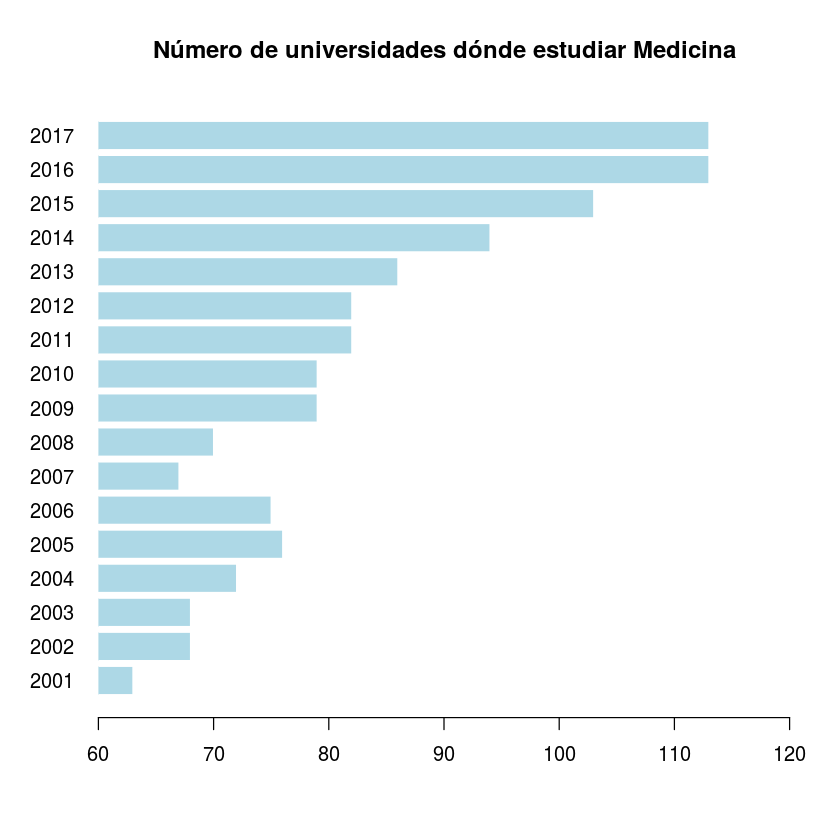

In [17]:
barplot(height = unisMed,horiz=TRUE,las=1,xlim=c(60,120),xpd=FALSE,
        border=FALSE,col="lightblue",main="Número de universidades dónde estudiar Medicina")
    

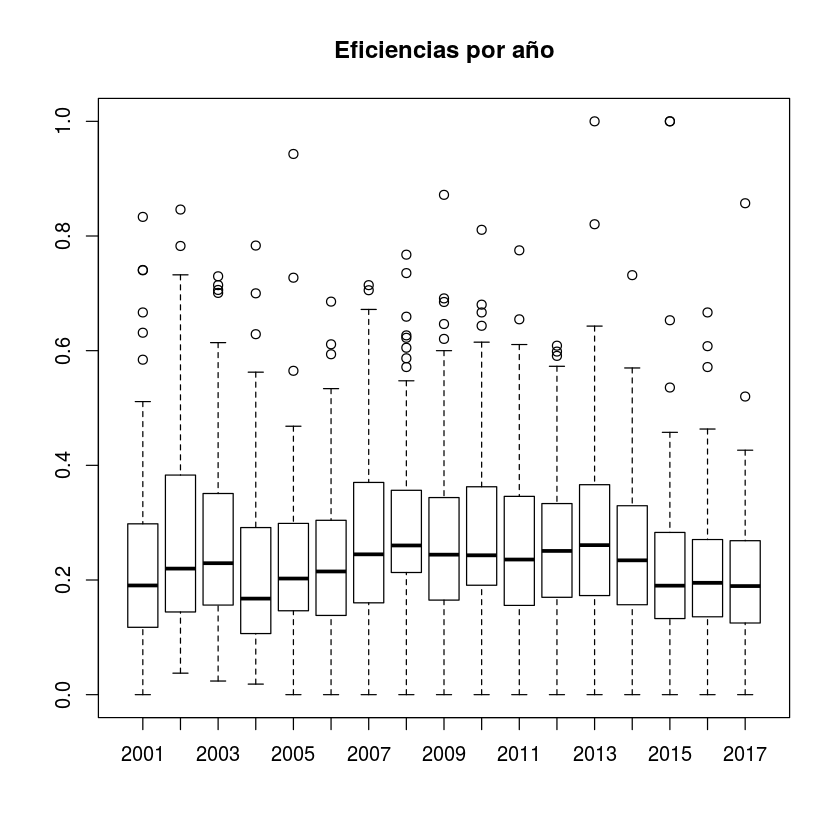

In [18]:
boxplot(d$efi ~ d$agno,main="Eficiencias por año")

In [19]:
efisMax <- aggregate(x = d$efi,by = list(d$agno),FUN = function(x){max(x,na.rm = T)})
names(efisMax)<-c("agno","efi")
efisMax

agno,efi
2001,0.8333333
2002,0.8461538
2003,0.7297297
2004,0.7833333
2005,0.9430894
2006,0.6855346
2007,0.7142857
2008,0.7674419
2009,0.8717949
2010,0.8108108


In [20]:
merge(efisMax,d,by = c("agno","efi"),all.x = T,sort = T)

agno,efi,fac,sust,sel
2001,0.8333333,UNIVERSIDAD DEL EJÉRCITO Y FUERZA AÉREA,12,10
2002,0.8461538,UNIVERSIDAD PANAMERICANA,26,22
2003,0.7297297,UNIVERSIDAD PANAMERICANA,37,27
2004,0.7833333,UNIVERSIDAD DEL EJÉRCITO Y FUERZA AÉREA,120,94
2005,0.9430894,SDN UNIVERSIDAD DEL EJÉRCITO Y FUERZA AÉREA,123,116
2006,0.6855346,UNIVERSIDAD AUTÓNOMA DE SAN LUIS POTOSÍ,159,109
2007,0.7142857,INST. TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY,63,45
2008,0.7674419,UNIVERSIDAD PANAMERICANA,43,33
2009,0.8717949,UNIV. PANAMERICANA,39,34
2010,0.8108108,UNIV. PANAMERICANA,37,30


In [21]:
nuevosEsp <- aggregate(d$sel,by = list(d$agno),FUN = sum)
names(nuevosEsp) <- c("agno","sel")
nuevosEsp

agno,sel
2001,3378
2002,4560
2003,4709
2004,4050
2005,5253
2006,5521
2007,4179
2008,4363
2009,6044
2010,6075


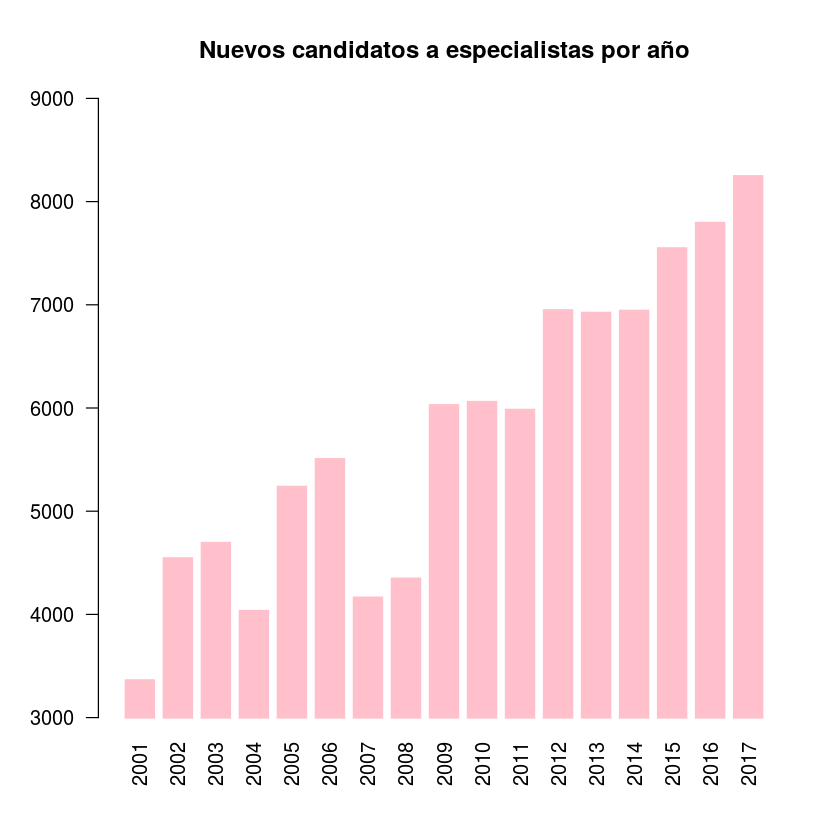

In [22]:
barplot(nuevosEsp$sel,names.arg = nuevosEsp$agno,las=2,ylim = c(3e3,9e3),
        xpd = F,border = F,col="pink",main="Nuevos candidatos a especialistas por año")

In [23]:
selMax <- aggregate(d$sel,by = list(d$agno),FUN = max)
names(selMax)<-c("agno","sel")
selMax

agno,sel
2001,434
2002,553
2003,569
2004,448
2005,503
2006,521
2007,383
2008,344
2009,620
2010,605


In [24]:
merge(selMax,d,by = c("agno","sel"),all.x = T,sort = T)

agno,sel,fac,sust,efi
2001,434,FACULTAD DE MEDICINA,1795,0.2417827
2002,553,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO (CU),1878,0.2944622
2003,569,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO (CU),1722,0.3304297
2004,448,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO (CU),1767,0.2535371
2005,503,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO (CU),1777,0.2830613
2006,521,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO (CU),1872,0.2783120
2007,383,UNIVERSIDAD AUTÓNOMA DE NUEVO LEÓN,747,0.5127175
2008,344,UNIVERSIDAD AUTÓNOMA DE NUEVO LEÓN,690,0.4985507
2009,620,UNAM FM CU,1337,0.4637248
2010,605,UNAM FM CU,1297,0.4664611


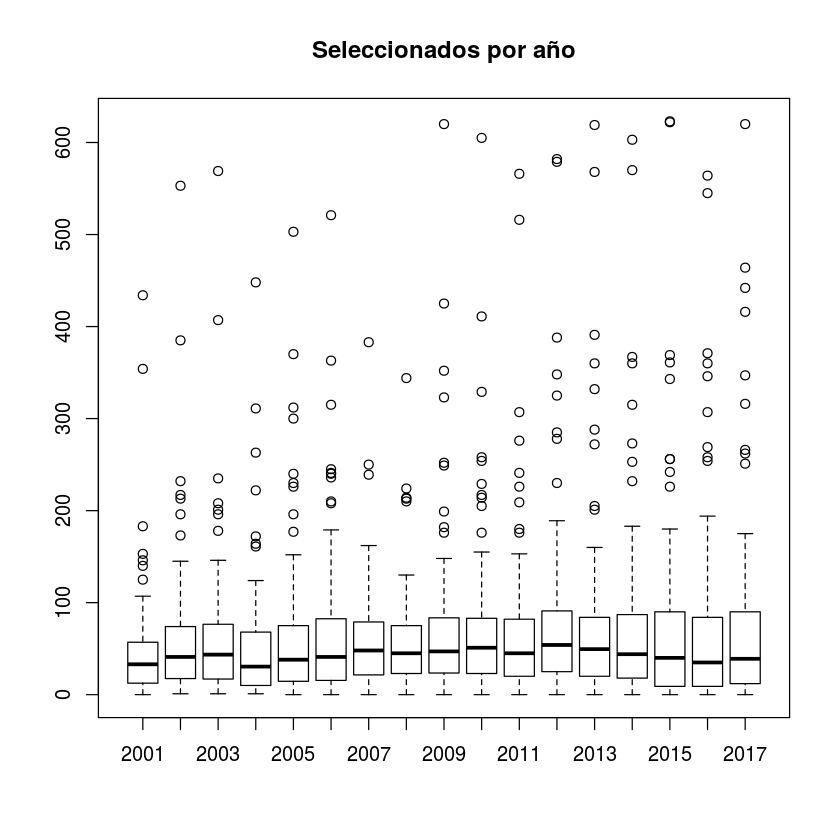

In [25]:

boxplot(d$sel ~ d$agno,main="Seleccionados por año")

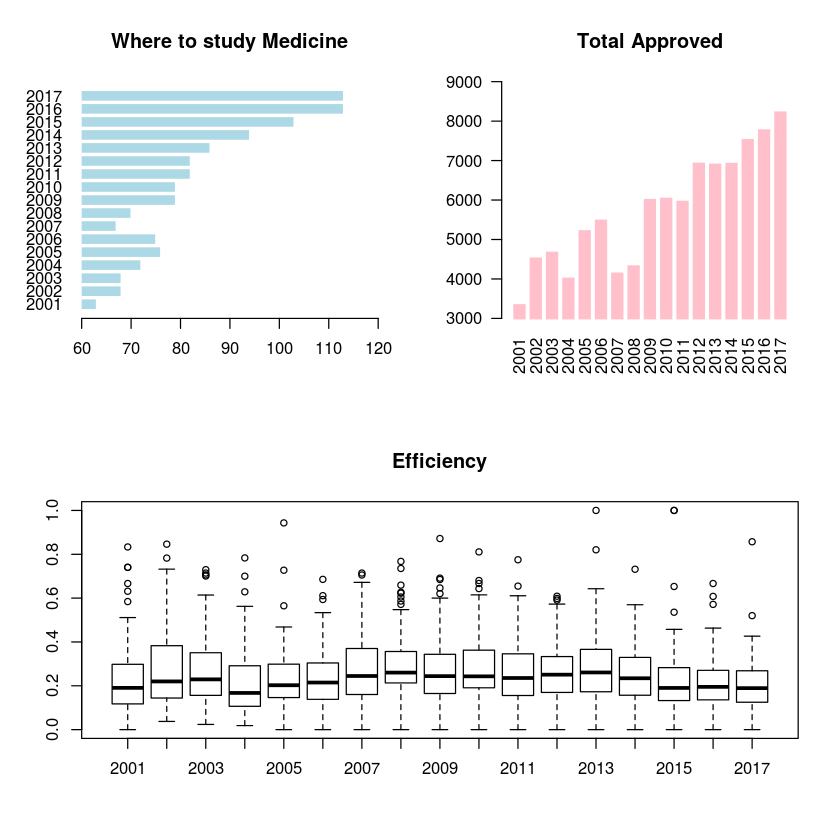

In [26]:
layout(matrix(c(1:2,3,3),2,2,byrow = T))
barplot(height = unisMed,horiz=TRUE,las=1,xlim=c(60,120),xpd=FALSE,
        border=FALSE,col="lightblue",main="Where to study Medicine")
barplot(nuevosEsp$sel,names.arg = nuevosEsp$agno,las=2,ylim = c(3e3,9e3),
        xpd = F,border = F,col="pink",main="Total Approved")
boxplot(d$efi ~ d$agno,main="Efficiency")


In [27]:

fi=(1+sqrt(5))/2
a=8
l=8/fi
png("plots00.png",width = a,height = l,units = "in",res = 150)
#layout(matrix(c(1:2,3,3),2,2,byrow = T))
#barplot(height = unisMed,horiz=TRUE,las=1,xlim=c(60,120),xpd=FALSE,
#        border=FALSE,col="lightblue",main="Where to study Medicine")
#barplot(nuevosEsp$sel,names.arg = nuevosEsp$agno,las=2,ylim = c(3e3,9e3),
#        xpd = F,border = F,col="pink",main="Total Approved")
boxplot(d$efi ~ d$agno,main="Efficiency")
dev.off()


png 
  2